In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [7]:
data=pd.read_csv('spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [15]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(100)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
95,spam,Your free ringtone is waiting to be collected....,1
96,ham,Watching telugu movie..wat abt u?,0
97,ham,i see. When we finish we have loads of loans t...,0
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...,0


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.25)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [29]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
emails=[
    'Sounds great! Are you home now?',
    'Free entry in 2 a wkly comp to win FA Cup final',
    'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [ ]:
clf.predict(emails)

In [31]:
clf.score(X_test,y_test)

0.9870782483847811

In [33]:
import joblib
joblib.dump(clf, 'clf.joblib')

['clf.joblib']

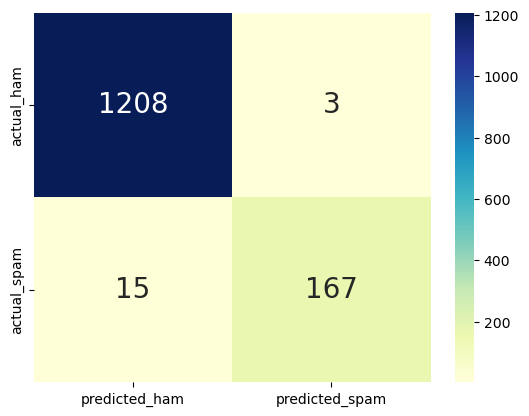

Accuracy: 0.987
Precision: 0.982
Recall: 0.918
F1 Score: 0.949


In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], 
            yticklabels=['actual_ham', 'actual_spam'], annot=True, fmt='d', 
            annot_kws={'fontsize': 20}, cmap="YlGnBu")
plt.show()

# Extracting values from the confusion matrix
true_neg, false_pos, false_neg, true_pos = cm.ravel()

# Calculating metrics
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg), 3)
precision = round((true_pos) / (true_pos + false_pos), 3)
recall = round((true_pos) / (true_pos + false_neg), 3)
f1 = round(2 * (precision * recall) / (precision + recall), 3)

# Displaying the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')